#Importing

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

#Reading the data

In [ ]:
df = pd.read_csv('sample_data/Darknet.csv')
display(df.head())
df.shape

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,8733.624454,229.000000,0.000000,229,229,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4914.004914,407.000000,0.000000,407,407,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4640.371230,431.000000,0.000000,431,431,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,5571.030641,359.000000,0.000000,359,359,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,6604.75239,91.942711,10887.324242,11412.466412,78158,13,10778451,18268.561017,11786.143089,81171,126,10747836,26936.932331,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


(158616, 85)

#Real testing dataset

In [ ]:
test_vpn = pd.read_csv('sample_data/test_vpn.pcap_Flow.csv')
test_tor = pd.read_csv('sample_data/test_tor.pcap_Flow.csv')
test_normal = pd.read_csv('sample_data/test_normal.pcap_Flow.csv')

In [ ]:
test_vpn.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,146.70.230.114-192.168.68.107-51820-62010-17,146.70.230.114,51820,192.168.68.107,62010,17,02/12/2025 09:22:24 AM,119900852,49312,17805,56039852.0,6833284.0,1424.0,80.0,1136.434377,508.685338,1424.0,32.0,383.784555,509.88314,5.243761e+05,559.770835,1.786472e+03,1.558284e+04,1972323.0,-233.0,119839559.0,2.430280e+03,2.065654e+04,2013282.0,0.0,119876380.0,6733.11503,32760.678626,2011399.0,0.0,0,0,0,0,394496,142440,411.273141,148.497694,32.0,1424.0,936.759975,607.860312,369494.158607,0,0,0,0,0,0,0,0,0.0,936.773932,1136.434377,383.784555,0,0,0,12574627,13423,551040,12328,14009963,4451,1708321,0,0,49311,8,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,NeedManualLabel
1,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,02/12/2025 09:22:26 AM,118682999,314,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000e+00,2.645703,3.791789e+05,8.651336e+05,6348571.0,0.0,118682999.0,3.791789e+05,8.651336e+05,6348571.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0,0,0,0,0,0,2.645703,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,5,0,0,0,0,0,0,0,43213506.0,7.675767e+06,48641093.0,37785919.0,5.683087e+06,941136.498342,6348571.0,5017603.0,NeedManualLabel
2,192.168.68.1-239.255.255.250-60942-1900-17,192.168.68.1,60942,239.255.255.250,1900,17,02/12/2025 09:22:48 AM,90220027,35,0,15209.0,0.0,463.0,383.0,434.542857,27.352108,0.0,0.0,0.000000,0.00000,1.685768e+02,0.387940,2.653530e+06,8.654142e+06,30096754.0,0.0,90220027.0,2.653530e+06,8.654142e+06,30096754.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0,0,0,0,280,0,0.387940,0.000000,383.0,463.0,433.111111,28.294147,800.558730,0,0,0,0,0,0,0,0,0.0,445.485714,434.542857,0.000000,0,0,0,3802,8,394772,11,5069,0,0,0,0,34,8,12842.0,2.810137e+03,16074.0,10976.0,3.006050e+07,62504.163240,30096754.0,29988327.0,NeedManualLabel
3,192.168.68.102-224.0.0.251-5353-5353-17,192.168.68.102,5353,224.0.0.251,5353,17,02/12/2025 09:22:26 AM,0,2,0,214.0,0.0,163.0,51.0,107.000000,79.195959,0.0,0.0,0.000000,0.00000,inf,inf,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0,0,0,0,16,0,0.000000,0.000000,51.0,163.0,88.333333,64.663230,4181.333333,0,0,0,0,0,0,0,0,0.0,132.500000,107.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,NeedManualLabel
4,192.168.68.107-224.0.0.22-0-0-0,192.168.68.107,0,224.0.0.22,0,0,02/12/2025 09:24:13 AM,7499743,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000e+00,0.400014,3.749872e+06,3.883990e+06,6496267.0,1003476.0,7499743.0,3.749872e+06,3.883990e+06,6496267.0,1003476.0,0.0,0.00000,0.000000,0.0,0.0,0,0,0,0,0,0,0.400014,0.000000,0.0,0.0,0.0

#Data cleaning and preprocessing for training data

In [ ]:
drop_cols = ["Flow ID", "Src IP", "Dst IP", "Timestamp", "Label.1", "CWE Flag Count"]
df.drop(columns=drop_cols, errors="ignore", inplace=True)

#real data
drop_cols_for_real_data = ["Flow ID", "Src IP", "Dst IP", "Timestamp", "Label.1", "Label", "CWR Flag Count"]
test_vpn.drop(columns=drop_cols_for_real_data, errors="ignore", inplace=True)
test_tor.drop(columns=drop_cols_for_real_data, errors="ignore", inplace=True)
test_normal.drop(columns=drop_cols_for_real_data, errors="ignore", inplace=True)

#dropping rows with missing or infinate values
df.replace([np.inf, -np.inf], pd.NA, inplace=True)
df.dropna(inplace=True)

#real
test_vpn.replace([np.inf, -np.inf], pd.NA, inplace=True)
test_vpn.dropna(inplace=True)
test_tor.replace([np.inf, -np.inf], pd.NA, inplace=True)
test_tor.dropna(inplace=True)
test_normal.replace([np.inf, -np.inf], pd.NA, inplace=True)
test_normal.dropna(inplace=True)

# Encode non-numeric features except the label / we are training based on label
non_numeric_cols_real = test_normal.select_dtypes(include=['object']).columns
non_numeric_cols = df.select_dtypes(include=['object']).columns.drop('Label')  # Exclude label


In [ ]:
le = LabelEncoder()
for col in non_numeric_cols:
    df[col] = le.fit_transform(df[col])

y = le.fit_transform(df["Label"])

In [ ]:
df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,57158,443,6,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,83868,229.000000,0.000000,229,229,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor
1,57159,443,6,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,83502,407.000000,0.000000,407,407,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor
2,57160,443,6,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,83452,431.000000,0.000000,431,431,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor
3,49134,443,6,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0,83596,359.000000,0.000000,359,359,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor
4,34697,19305,6,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,63803,76725,10887.324242,11412.466412,78158,13,10778451,18268.561017,11786.143089,81171,126,10747836,26936.932331,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor


In [ ]:
test_normal.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,50497,443,6,1474895,13,13,1747.0,1878.0,193.0,0.0,134.384615,87.624710,363.0,0.0,144.461538,131.790626,2457.802081,17.628374,58995.800000,243920.513439,1225402.0,0.0,1470277.0,122523.083333,366996.825008,1285283.0,47.0,1447595.0,120632.916667,354215.690353,1240133.0,0.0,1,0,0,0,260,260,8.814187,8.814187,0.0,363.0,141.259259,108.057888,11676.507123,1,0,0,18,26,0,0,1.0,146.692308,134.384615,144.461538,0,0,0,1812,9,19117,13,1747,13,1878,253,447,9,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50497,443,6,13076,2,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,229.42796,6538.000000,4412.346315,9658.0,3418.0,3418.0,3418.000000,0.000000,3418.0,3418.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,20,152.951973,76.475987,0.0,0.0,0.000000,0.000000,0.000000,1,0,1,0,2,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,253,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,443,50497,6,4772,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,419.111484,4772.000000,0.000000,4772.0,4772.0,4772.0,4772.000000,0.000000,4772.0,4772.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,0,419.111484,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,2,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1487,443,6,58492,6,10,1787.0,10714.0,1412.0,0.0,297.833333,566.063748,1412.0,0.0,1071.400000,593.120599,213721.534569,273.541681,3899.466667,7139.032856,21814.0,0.0,58492.0,11698.400000,12911.865872,30685.0,0.0,39816.0,4424.000000,9085.638778,24592.0,0.0,0,0,0,0,132,212,102.578130,170.963551,0.0,1412.0,735.352941,688.605016,474176.867647,1,2,1,5,15,0,0,1.0,781.312500,297.833333,1071.400000,0,0,0,12501,10,337518,0,0,0,0,65535,1047,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43934,443,6,7290079,79,78,11242.0,15395.0,1460.0,0.0,142.303797,181.768122,1460.0,0.0,197.371795,311.008795,3653.869869,21.536118,46731.275641,174018.046964,1573359.0,0.0,7286927.0,93422.141026,238219.040178,1573359.0,0.0,7273023.0,94454.844156,248531.256278,1593855.0,0.0,0,0,0,0,1592,1572,10.836645,10.699473,0.0,1460.0,168.588608,254.546609,64793.976175,1,2,0,104,156,0,0,0.0,169.662420,142.303797,197.371795,0,0,0,13318,53,4674,79,11242,78,15395,65535,673,53,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Each category becomes a new column, and a '1' in that column indicates the presence of that category, while '0' indicates its absence.
# example = array([1., 0., 0., 0.]) for the presence of Non-Tor
y_catagorical = to_categorical(y)

# Normalizing
X = df.drop(columns=["Label"])
scaler = MinMaxScaler() # Initialize scaler
X_scaled = scaler.fit_transform(X) # Fit and transform X
test_normal_scaled = scaler.transform(test_normal)
test_vpn_scaled = scaler.transform(test_vpn)
test_tor_scaled = scaler.transform(test_tor)

#Data cleaning and preprocessing for real data

In [ ]:
test_normal_scaled.shape

(2215, 78)

In [ ]:
df.shape

(158566, 79)

#Feature Coorelation

In [ ]:
df_for_corr = df.drop(columns=['Label']).copy()
df_for_corr['Label'] = y

label_corr = df_for_corr.corr()['Label'].sort_values(ascending=False)
print("\nCorrelation with Label:")
print(label_corr)


Correlation with Label:
Label                         1.000000
Bwd Packet Length Min         0.595157
Flow Bytes/s                  0.442891
Protocol                      0.391005
Packet Length Min             0.308893
Fwd Packet Length Min         0.264542
Flow Packets/s                0.211541
Bwd Segment Size Avg          0.185657
Bwd Packet Length Mean        0.185657
Subflow Bwd Bytes             0.162472
Average Packet Size           0.120605
Packet Length Mean            0.066072
Bwd Init Win Bytes            0.058297
RST Flag Count                0.052008
Fwd Act Data Pkts             0.047323
PSH Flag Count                0.047173
Total Fwd Packet              0.042101
Fwd Header Length             0.041013
Packet Length Std             0.036924
Bwd Packet/Bulk Avg           0.033297
Bwd Packet Length Max         0.031488
ACK Flag Count                0.027690
Bwd Header Length             0.026949
Total Bwd packets             0.026419
Total Length of Fwd Packet    0.023609


#Train/Test


In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y_catagorical, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42) # 0.25 of 0.8 is 0.2 of total

X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

X_train_lstm.shape

(95139, 1, 78)

#Building the LSTM model

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[1]), return_sequences=True, name="Input_layer"))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(y_catagorical.shape[1], activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (LSTM)              │ (None, 1, 64)          │        36,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,156 (192.02 KB)

 Trainable params: 49,156 (192.02 KB)

 Non-trainable params: 0 (0.00 B)

#Train the model

In [ ]:
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=64, validation_data=(X_val_lstm, y_val), callbacks=[early_stop], verbose=1)

Epoch 1/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7786 - loss: 0.6685 - val_accuracy: 0.8890 - val_loss: 0.3078
Epoch 2/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8876 - loss: 0.3123 - val_accuracy: 0.9070 - val_loss: 0.2458
Epoch 3/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9014 - loss: 0.2574 - val_accuracy: 0.9127 - val_loss: 0.2232
Epoch 4/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9090 - loss: 0.2328 - val_accuracy: 0.9186 - val_loss: 0.2091
Epoch 5/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9180 - loss: 0.2139 - val_accuracy: 0.9222 - val_loss: 0.1986
Epoch 6/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9212 - loss: 0.2079 - val_accuracy: 0.9289 - val_loss: 0.1898
Epoch 7/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9253 - loss: 0.1988 - val_accuracy: 0.9307 - val_loss: 0.1839
Epoch 8/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9275 - loss: 0.1917 -

In [ ]:
model.save('my_model.keras')

In [ ]:
loaded_model = tf.keras.models.load_model('sample_data/my_model.keras')
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (LSTM)              │ (None, 1, 64)          │        36,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,470 (576.06 KB)

 Trainable params: 49,156 (192.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 98,314 (384.04 KB)

In [ ]:
y_pred = np.argmax(loaded_model.predict(X_test_lstm), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=le.classes_))

992/992 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

     Non-Tor       0.99      1.00      0.99     21928
      NonVPN       0.89      0.80      0.84      4929
         Tor       0.96      0.82      0.88       276
         VPN       0.82      0.87      0.84      4581

    accuracy                           0.95     31714
   macro avg       0.91      0.87      0.89     31714
weighted avg       0.95      0.95      0.95     31714



<Axes: >

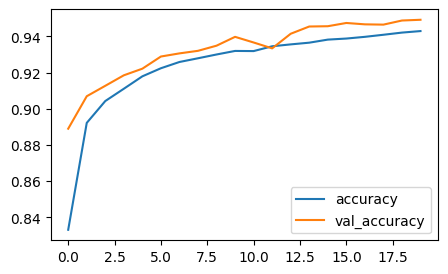

In [ ]:
model_loss = pd.DataFrame(history.history)
model_loss[['accuracy', 'val_accuracy']].plot(figsize=(5, 3))

In [ ]:
print(loaded_model.evaluate(X_test_lstm, y_test))

992/992 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9438 - loss: 0.1605
[0.15683451294898987, 0.9469319581985474]


#understanding the result

In [ ]:
def plot_label_counts(counts, title):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(title)
    plt.xlabel('Traffic Type')
    plt.ylabel('Count')
    plt.show()

In [ ]:
y_pred_probs_test = loaded_model.predict(X_test_lstm)
y_pred_indices_test = np.argmax(y_pred_probs_test, axis=1)

992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
predicted_labels_test = le.inverse_transform(y_pred_indices_test)
print("First 5 predicted labels:", predicted_labels_test[:5])

First 5 predicted labels: ['VPN' 'Non-Tor' 'VPN' 'Tor' 'Non-Tor']


In [ ]:
counts_test = pd.Series(predicted_labels_test).value_counts()
print(counts_test)

Non-Tor    22156
VPN         4859
NonVPN      4463
Tor          236
Name: count, dtype: int64



Predicted Traffic Types for test:
Non-Tor    22156
VPN         4859
NonVPN      4463
Tor          236
Name: count, dtype: int64


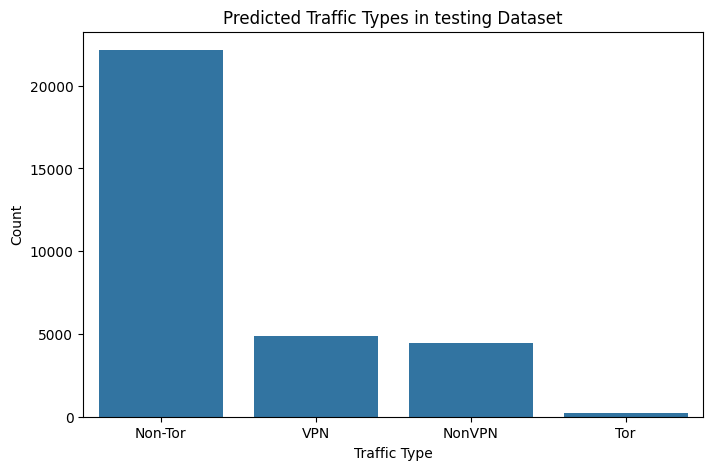

In [ ]:
# Predict on testing dataset
counts_normal = pd.Series(predicted_labels_test).value_counts()
print("\nPredicted Traffic Types for test:")
print(counts_normal)
plot_label_counts(counts_normal, 'Predicted Traffic Types in testing Dataset')

#**Testing on Real data** ☹

In [ ]:
X_test_vpn_lstm = test_vpn_scaled.reshape((test_vpn_scaled.shape[0], 1, test_vpn_scaled.shape[1]))
X_test_tor_lstm = test_tor_scaled.reshape((test_tor_scaled.shape[0], 1, test_tor_scaled.shape[1]))
X_test_normal_lstm = test_normal_scaled.reshape((test_normal_scaled.shape[0], 1, test_normal_scaled.shape[1]))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Predicted Traffic Types for test_vpn:
NonVPN     64
Non-Tor    36
VPN        35
Name: count, dtype: int64


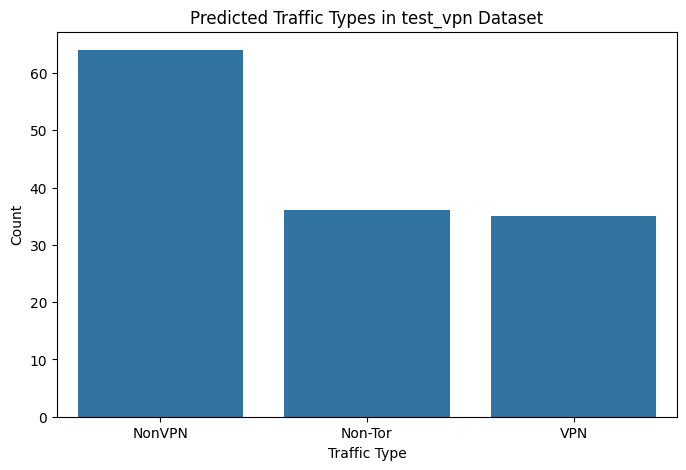

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Predicted Traffic Types for test_tor:
Non-Tor    57
NonVPN     38
VPN        10
Name: count, dtype: int64


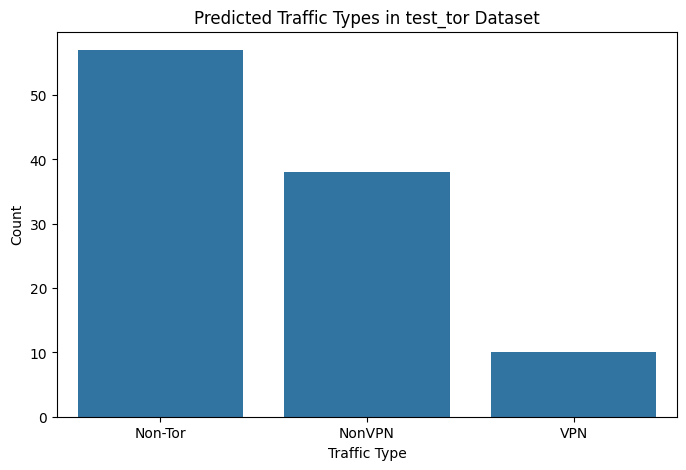

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Predicted Traffic Types for test_normal:
Non-Tor    975
VPN        719
NonVPN     514
Tor          7
Name: count, dtype: int64


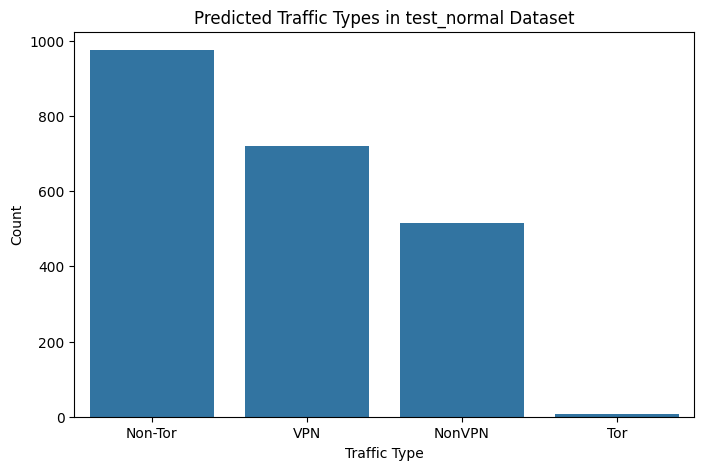

In [ ]:
# Predict on test_vpn data
y_pred_vpn = loaded_model.predict(X_test_vpn_lstm)
predicted_labels_vpn = le.inverse_transform(np.argmax(y_pred_vpn, axis=1))
counts_vpn = pd.Series(predicted_labels_vpn).value_counts()
print("Predicted Traffic Types for test_vpn:")
print(counts_vpn)
plot_label_counts(counts_vpn, 'Predicted Traffic Types in test_vpn Dataset')

# Predict on test_tor data
y_pred_tor = loaded_model.predict(X_test_tor_lstm)
predicted_labels_tor = le.inverse_transform(np.argmax(y_pred_tor, axis=1))
counts_tor = pd.Series(predicted_labels_tor).value_counts()
print("\nPredicted Traffic Types for test_tor:")
print(counts_tor)
plot_label_counts(counts_tor, 'Predicted Traffic Types in test_tor Dataset')

# Predict on test_normal data
y_pred_normal = loaded_model.predict(X_test_normal_lstm)
predicted_labels_normal = le.inverse_transform(np.argmax(y_pred_normal, axis=1))
counts_normal = pd.Series(predicted_labels_normal).value_counts()
print("\nPredicted Traffic Types for test_normal:")
print(counts_normal)
plot_label_counts(counts_normal, 'Predicted Traffic Types in test_normal Dataset')